129L Section 2 <br>
1/14/25 <br>
William Melby

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Task 1**: Convex hull in 2D

Part 1: Build Algorithms

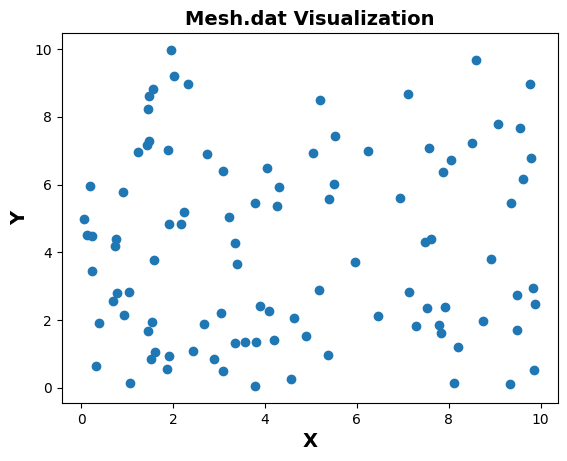

In [2]:
# Load the .dat file
data = pd.read_csv("mesh.dat", delimiter=" ")  # Adjust the delimiter based on file format

# Plot the data
plt.plot(data['X'], data['Y'], marker='o', linestyle=' ')
plt.xlabel("X", fontsize=14, fontweight='bold')
plt.ylabel("Y", fontsize=14, fontweight='bold')
plt.title("Mesh.dat Visualization", fontsize=14, fontweight='bold')
plt.show()

In [9]:
print(data)

           X         Y
0   7.886064  6.359793
1   2.321047  8.954139
2   0.241770  4.484384
3   8.585893  9.667951
4   0.733972  4.184429
..       ...       ...
95  2.225854  5.189698
96  3.088985  0.506305
97  0.907754  5.776031
98  5.203489  8.485519
99  3.223847  5.037382

[100 rows x 2 columns]


In [3]:
def get_cross_product(p1, p2, p3):
		return ((p2[0] - p1[0])*(p3[1] - p1[1])) - ((p2[1] - p1[1])*(p3[0] - p1[0]))

In [4]:
def get_slope(p1, p2):
    if p1[0] == p2[0]:
        return float('inf')
    else:
        return 1.0*(p1[1]-p2[1])/(p1[0]-p2[0])

In [5]:
def compute_convex_hull(points):
		hull = []
		points.sort(key=lambda x:[x[0],x[1]])
		start = points.pop(0)
		hull.append(start)
		points.sort(key=lambda p: (get_slope(p,start), -p[1],p[0]))
		for pt in points:
			hull.append(pt)
			while len(hull) > 2 and get_cross_product(hull[-3],hull[-2],hull[-1]) < 0:
				hull.pop(-2)
		return hull